In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_super = pd.read_csv("C:\\users\\siddharth.vij\\Supermarket_Sales_Dataset-1.csv")

In [3]:
df_super.head(5)

,Invoice ID,Branch,City,Customer Type,Gender,Product Type,Unit Price,Quantity,Tax,Selling Price,Date,Time,Payment Type,Cost Price,Gross Income,Rating
0,750-67-8428,A,Bangalore,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Debit card,522.83,26.1415,9.1
1,226-31-3081,C,Mysore,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6
2,631-41-3108,A,Bangalore,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4
3,123-19-1176,A,Bangalore,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Debit card,465.76,23.2880,8.4
4,373-73-7910,A,Bangalore,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Debit card,604.17,30.2085,5.3


# Perform data wrangling / pre-processing

In [4]:
df_super.describe()

,Unit Price,Quantity,Tax,Selling Price,Cost Price,Gross Income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,49.650000,10.00000


In [5]:
df_super.isnull().sum()

Invoice ID       0
Branch           0
City             0
Customer Type    0
Gender           0
Product Type     0
Unit Price       0
Quantity         0
Tax              0
Selling Price    0
Date             0
Time             0
Payment Type     0
Cost Price       0
Gross Income     0
Rating           0
dtype: int64

# Perform exploratory analysis on the data and describe your understanding of the data. 

In [6]:
df_super.columns = df_super.columns.str.lower().str.replace(" ", "_")

In [7]:
strings = list(df_super.dtypes[df_super.dtypes == 'object'].index)
for col in strings:
    df_super[col] = df_super[col].str.lower().str.replace(" ", "_")


In [8]:
df_super['date'] = pd.to_datetime(df_super['date'])

In [9]:
df_super['year'] = df_super['date'].dt.year
df_super['month'] = df_super['date'].dt.month
df_super['day'] = df_super['date'].dt.day_name()

Text(0.5, 1.0, ' Types of customers ')

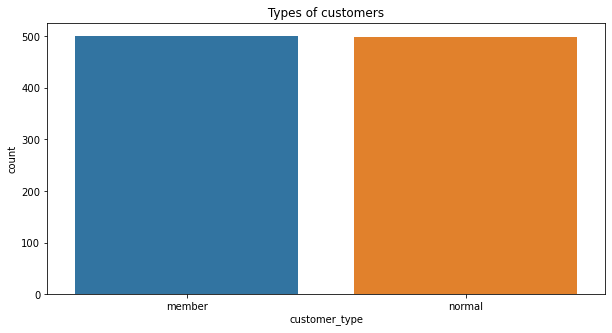

In [10]:
plt.figure(figsize = (10, 5))
sns.countplot(x = 'customer_type', data = df_super)
plt.title(" Types of customers ")


Text(0.5, 1.0, ' Number of transactions per gender')

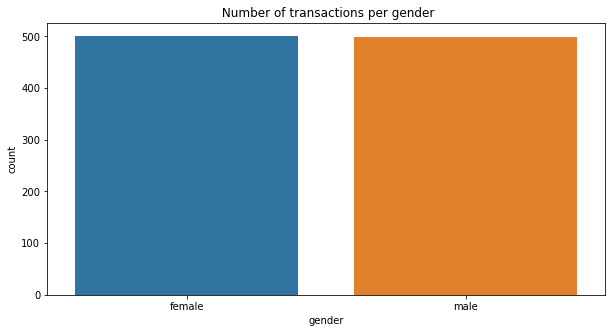

In [11]:
plt.figure(figsize= (10, 5))
sns.countplot(x= 'gender', data = df_super)
plt.title(" Number of transactions per gender")

Text(0.5, 1.0, ' gross income by city')

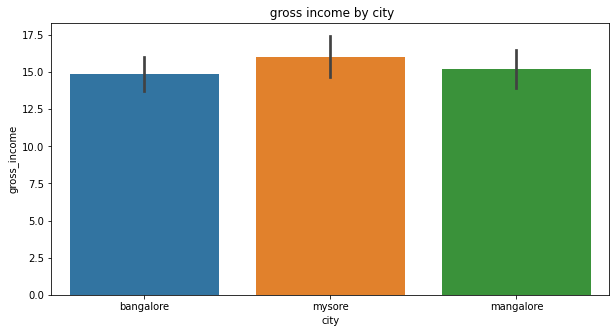

In [12]:
plt.figure(figsize= (10, 5))
sns.barplot(x= 'city', y= 'gross_income',data = df_super)
plt.title(" gross income by city")

Text(0.5, 1.0, 'Tax payed per city')

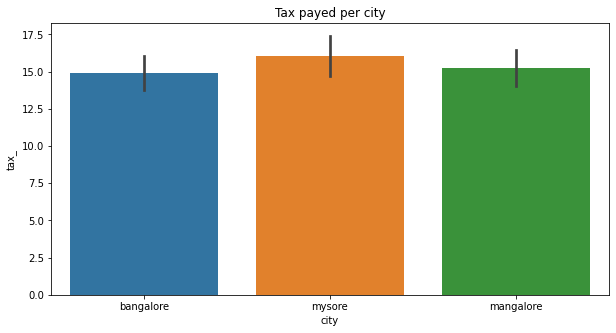

In [13]:
plt.figure(figsize= (10, 5))
sns.barplot(x= 'city',y= 'tax_', data = df_super)
plt.title("Tax payed per city")


Text(0.5, 1.0, 'Gross income  per product Type')

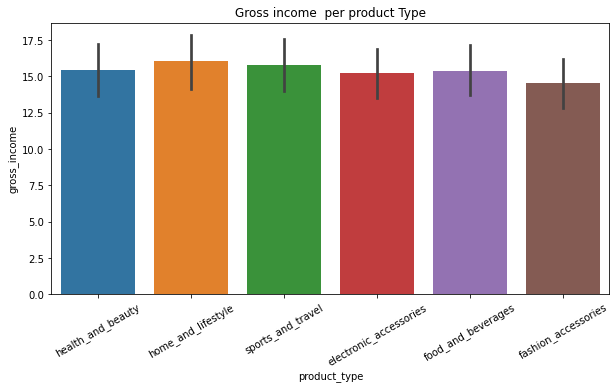

In [14]:
plt.figure(figsize= (10, 5))
plt.xticks(rotation = 30)
sns.barplot(x= 'product_type', y='gross_income', data = df_super, order = df_super.product_type.value_counts().sort_values(ascending = True).index)
plt.title("Gross income  per product Type")

In [15]:
Best_branch = df_super.groupby("branch")['gross_income'].sum().sort_values(ascending = False).head()
Best_city =  df_super.groupby("city")['gross_income'].sum().sort_values(ascending = False).head()
print(Best_branch)
print(Best_city)

branch
c    5265.1765
a    5057.1605
b    5057.0320
Name: gross_income, dtype: float64
city
mysore       5265.1765
bangalore    5057.1605
mangalore    5057.0320
Name: gross_income, dtype: float64


Text(0.5, 1.0, 'Grows income distribution')

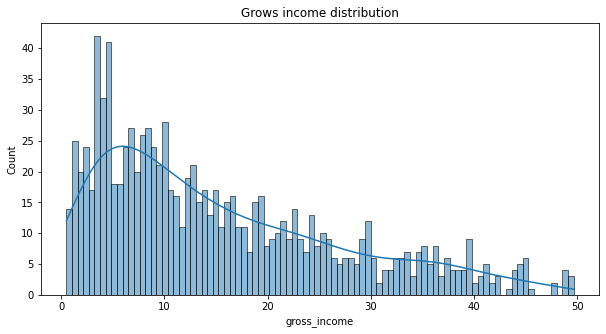

In [16]:
plt.figure(figsize = (10, 5))
sns.histplot(x=df_super.gross_income, kde= True, bins = 90)
plt.title("Grows income distribution")

<AxesSubplot:xlabel='tax_', ylabel='Count'>

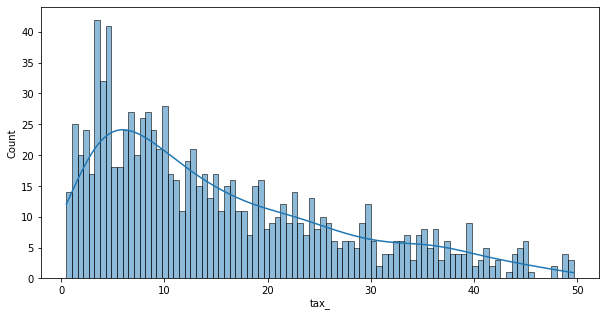

In [17]:
plt.figure(figsize = (10, 5))
sns.histplot(x=df_super['tax_'], kde= True, bins = 90)

Text(0.5, 1.0, 'Unit price distribution ')

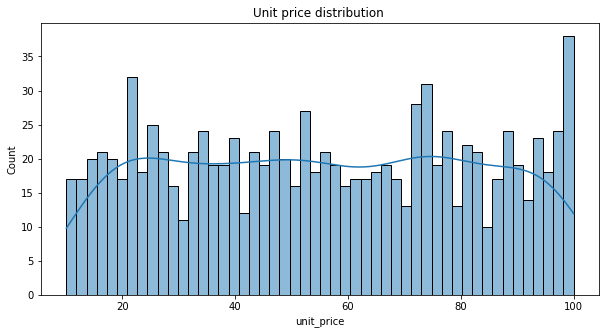

In [18]:
plt.figure(figsize = (10, 5))
sns.histplot(x=df_super['unit_price'], kde= True, bins = 50)
plt.title("Unit price distribution ")

Text(0.5, 1.0, ' Product quantity distribution ')

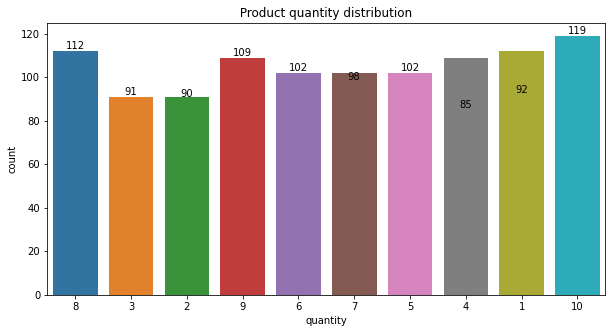

In [19]:
plt.figure(figsize = (10, 5))
ax =sns.countplot(x= "quantity", data =df_super)
for container in ax.containers:
    ax.bar_label(container)
sns.countplot(x = df_super.quantity, order = df_super.quantity.value_counts().sort_values(ascending=True).index)    
plt.title(" Product quantity distribution ")

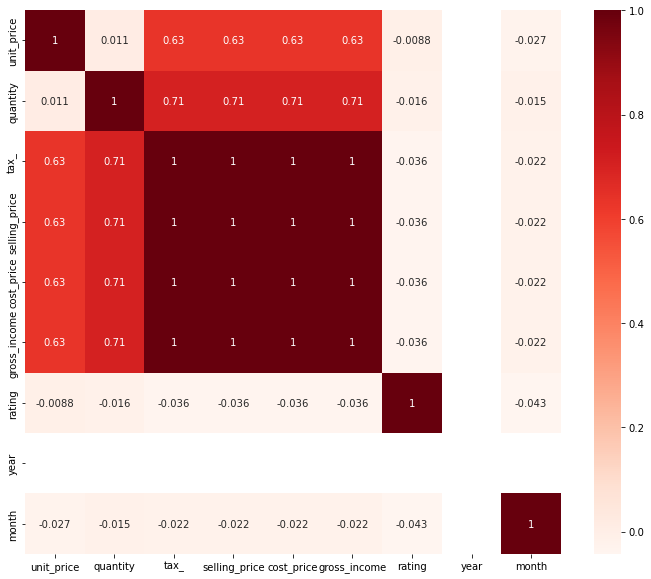

In [20]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_super.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Apply any two feature selection engineering techniques
1] correlation coefficient

In [21]:
#Correlation with output variable
cor_target = abs(cor["gross_income"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

unit_price       0.633962
quantity         0.705510
tax_             1.000000
selling_price    1.000000
cost_price       1.000000
gross_income     1.000000
Name: gross_income, dtype: float64

2] Backward Elimination

In [22]:
X = df_super.drop(["gross_income","invoice_id","branch","city","customer_type","gender","product_type","date","time","payment_type","day"],axis=1)  #Feature Matrix
y = df_super["gross_income"]          #Target Variable
#df_super.head()

In [23]:
import statsmodels.api as sm
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1.astype(float)).fit()
model.pvalues

C:\Users\siddharth.vij\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


unit_price       8.348111e-11
quantity         4.754443e-04
tax_             0.000000e+00
selling_price    0.000000e+00
cost_price       0.000000e+00
rating           1.000000e+00
year             2.416101e-01
month            2.440608e-04
dtype: float64

#From above  analysis we are picking 5 feature for analysis 5 features for analysis unit_price       0.633962
quantity         0.705510
tax_             1.000000
selling_price    1.000000
cost_price       1.000000
gross_income     1.000000

# Compare the two selected feature engineering techniques

# Plot top 5, 6, and 8 features. 

Text(0.5, 1.0, 'Cost_Price Vs Product_Type')

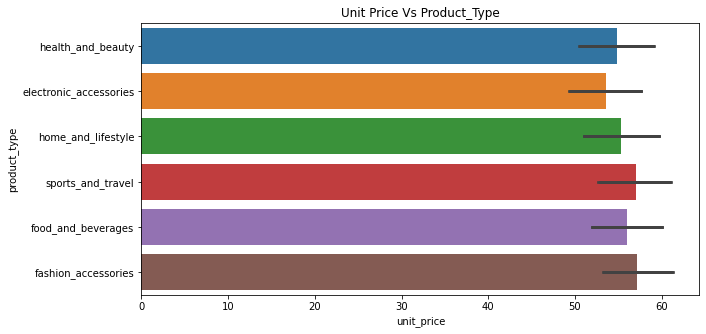

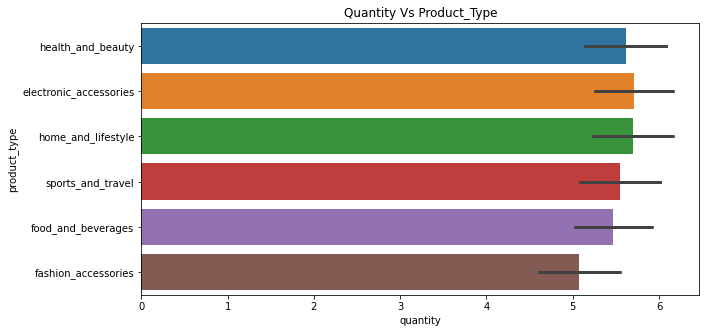

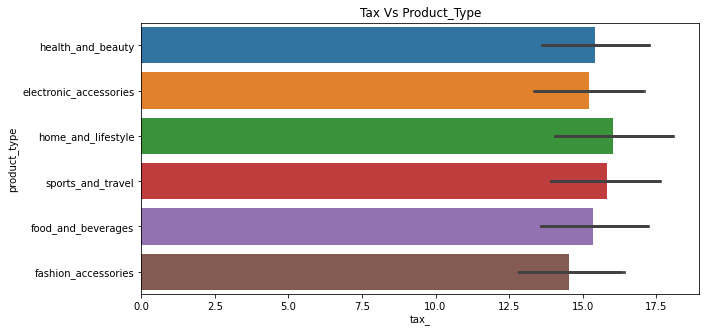

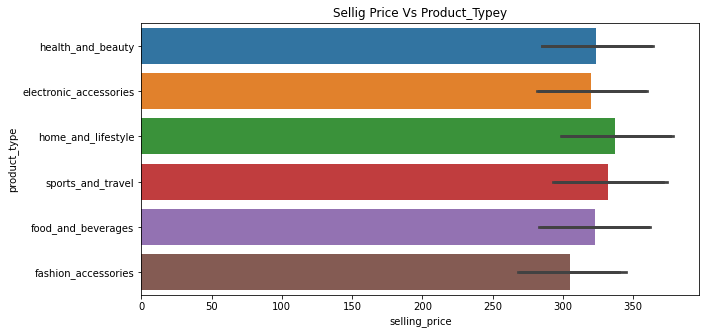

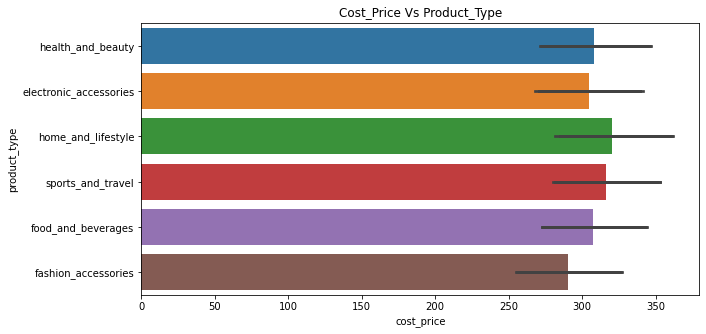

In [24]:

x=['unit_price','quantity','tax_','selling_price','cost_price']

plt.figure(figsize= (10, 5))
for i in range(0,len(x)):
    sns.barplot(x='unit_price',y='product_type', data = df_super)
plt.title("Unit Price Vs Product_Type")

plt.figure(figsize= (10, 5))
for i in range(0,len(x)):
    sns.barplot(x='quantity',y='product_type', data = df_super)
plt.title("Quantity Vs Product_Type")

plt.figure(figsize= (10, 5))
for i in range(0,len(x)):
    sns.barplot(x='tax_',y='product_type', data = df_super)
plt.title("Tax Vs Product_Type")

plt.figure(figsize= (10, 5))
for i in range(0,len(x)):
    sns.barplot(x='selling_price',y='product_type', data = df_super)
plt.title("Sellig Price Vs Product_Typey")

plt.figure(figsize= (10, 5))
for i in range(0,len(x)):
    sns.barplot(x='cost_price',y='product_type', data = df_super)
plt.title("Cost_Price Vs Product_Type")

# Provide a high-level description of Machine Learning models – association rules and random forest to predict

In [25]:
df_super1=df_super

df_super=df_super.drop(['invoice_id','tax_', 'time', 'payment_type', 'date'],axis=1)
from sklearn.preprocessing import LabelEncoder
df_col=list(df_super.columns)

for i in range(len(df_col)):
    df_super[df_col[i]] = LabelEncoder().fit_transform(df_super[df_col[i]])
    
df_super.head()


,branch,city,customer_type,gender,product_type,unit_price,quantity,selling_price,cost_price,gross_income,rating,year,month,day
0,0,0,0,0,3,670,6,804,804,804,51,0,0,2
1,2,2,1,0,0,50,4,144,144,144,56,0,2,0
2,0,0,1,1,4,370,6,609,609,609,34,0,2,3
3,0,0,0,1,3,501,7,756,756,756,44,0,0,3
4,0,0,1,1,5,782,6,857,857,857,13,0,1,0


In [26]:
df_super1.head()

,invoice_id,branch,city,customer_type,gender,product_type,unit_price,quantity,tax_,selling_price,date,time,payment_type,cost_price,gross_income,rating,year,month,day
0,750-67-8428,a,bangalore,member,female,health_and_beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,debit_card,522.83,26.1415,9.1,2019,1,Saturday
1,226-31-3081,c,mysore,normal,female,electronic_accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,cash,76.40,3.8200,9.6,2019,3,Friday
2,631-41-3108,a,bangalore,normal,male,home_and_lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,credit_card,324.31,16.2155,7.4,2019,3,Sunday
3,123-19-1176,a,bangalore,member,male,health_and_beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,debit_card,465.76,23.2880,8.4,2019,1,Sunday
4,373-73-7910,a,bangalore,normal,male,sports_and_travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,debit_card,604.17,30.2085,5.3,2019,2,Friday


#Random Forest Technique

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#Defining features
X = df_super[['branch', 'city', 'customer_type', 'gender', 'gross_income', 'unit_price','quantity','selling_price',
              'cost_price','year','month', 'day']]
y = df_super['product_type']

#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

print(f'Total number of feature dataset: {len(X)}')
print(f'Total number of training data: {len(X_train)}')
print(f'Shape of train data: {X_train.shape}')
print(f'Shape of test data: {X_test.shape}')

Total number of feature dataset: 1000
Total number of training data: 750
Shape of train data: (750, 12)
Shape of test data: (250, 12)


In [28]:
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
regressor = RandomForestClassifier()
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


[[ 4  7  7  6  6 13]
 [ 7  9 15  5  3  8]
 [ 5 15  4  8  4  4]
 [10  4 12  4  5  6]
 [ 8  5  8  7 12  3]
 [ 5  2 12  4  6  7]]


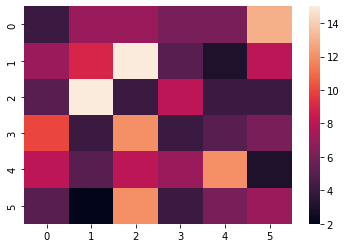

In [29]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(conf_mat)
plt.show()

In [31]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.10      0.09      0.10        43
           1       0.21      0.19      0.20        47
           2       0.07      0.10      0.08        40
           3       0.12      0.10      0.11        41
           4       0.33      0.28      0.30        43
           5       0.17      0.19      0.18        36

    accuracy                           0.16       250
   macro avg       0.17      0.16      0.16       250
weighted avg       0.17      0.16      0.16       250



#Association Rules Technique

In [365]:
df_super1=df_super1.drop(['invoice_id','date','time','rating','year','month','day'],axis=1)
df_super1.head(3)

,branch,city,customer_type,gender,product_type,unit_price,quantity,tax_,selling_price,payment_type,cost_price,gross_income
0,a,bangalore,member,female,health_and_beauty,74.69,7,26.1415,548.9715,debit_card,522.83,26.1415
1,c,mysore,normal,female,electronic_accessories,15.28,5,3.8200,80.2200,cash,76.40,3.8200
2,a,bangalore,normal,male,home_and_lifestyle,46.33,7,16.2155,340.5255,credit_card,324.31,16.2155


In [366]:
records=[]
for i in range(0,1000):
    records.append([str(df_super1.values[i,j]) for j in range(0,12)])
print(records[1])

['c', 'mysore', 'normal', 'female', 'electronic_accessories', '15.28', '5', '3.82', '80.22', 'cash', '76.4', '3.82']


In [367]:
from apyori import apriori

association_rules = apriori(records, min_support=0.0045, min_confidence=0.5, min_lift=3, min_length=3)
association_results = list(association_rules)
print(type(association_results))
print(len(association_results))
for i in range(0,len(association_results)):
    print(association_results[i])


<class 'list'>
1441
RelationRecord(items=frozenset({'b', 'mangalore'}), support=0.332, ordered_statistics=[OrderedStatistic(items_base=frozenset({'b'}), items_add=frozenset({'mangalore'}), confidence=1.0, lift=3.012048192771084), OrderedStatistic(items_base=frozenset({'mangalore'}), items_add=frozenset({'b'}), confidence=1.0, lift=3.012048192771084)])
RelationRecord(items=frozenset({'mysore', 'c'}), support=0.328, ordered_statistics=[OrderedStatistic(items_base=frozenset({'c'}), items_add=frozenset({'mysore'}), confidence=1.0, lift=3.048780487804878), OrderedStatistic(items_base=frozenset({'mysore'}), items_add=frozenset({'c'}), confidence=1.0, lift=3.048780487804878)])
RelationRecord(items=frozenset({'b', '1', 'mangalore'}), support=0.032, ordered_statistics=[OrderedStatistic(items_base=frozenset({'b'}), items_add=frozenset({'1', 'mangalore'}), confidence=0.09638554216867469, lift=3.012048192771084), OrderedStatistic(items_base=frozenset({'mangalore'}), items_add=frozenset({'b', '1'})

RelationRecord(items=frozenset({'bangalore', 'cash', 'female', 'a', '3'}), support=0.008, ordered_statistics=[OrderedStatistic(items_base=frozenset({'a', '3'}), items_add=frozenset({'cash', 'bangalore', 'female'}), confidence=0.23529411764705882, lift=3.988035892323031), OrderedStatistic(items_base=frozenset({'bangalore', '3'}), items_add=frozenset({'cash', 'a', 'female'}), confidence=0.23529411764705882, lift=3.988035892323031), OrderedStatistic(items_base=frozenset({'a', 'cash'}), items_add=frozenset({'bangalore', 'female', '3'}), confidence=0.07272727272727272, lift=5.194805194805195), OrderedStatistic(items_base=frozenset({'a', 'female'}), items_add=frozenset({'cash', 'bangalore', '3'}), confidence=0.049689440993788817, lift=4.517221908526256), OrderedStatistic(items_base=frozenset({'cash', 'bangalore'}), items_add=frozenset({'a', 'female', '3'}), confidence=0.07272727272727272, lift=5.194805194805195), OrderedStatistic(items_base=frozenset({'bangalore', 'female'}), items_add=froze

RelationRecord(items=frozenset({'bangalore', 'credit_card', 'male', 'food_and_beverages', 'a', 'normal'}), support=0.007, ordered_statistics=[OrderedStatistic(items_base=frozenset({'a', 'credit_card'}), items_add=frozenset({'bangalore', 'male', 'normal', 'food_and_beverages'}), confidence=0.06730769230769232, lift=4.20673076923077), OrderedStatistic(items_base=frozenset({'a', 'food_and_beverages'}), items_add=frozenset({'bangalore', 'credit_card', 'male', 'normal'}), confidence=0.12068965517241378, lift=4.310344827586206), OrderedStatistic(items_base=frozenset({'a', 'male'}), items_add=frozenset({'bangalore', 'credit_card', 'normal', 'food_and_beverages'}), confidence=0.03910614525139665, lift=3.5551041137633317), OrderedStatistic(items_base=frozenset({'bangalore', 'credit_card'}), items_add=frozenset({'a', 'male', 'normal', 'food_and_beverages'}), confidence=0.06730769230769232, lift=4.20673076923077), OrderedStatistic(items_base=frozenset({'bangalore', 'food_and_beverages'}), items_a

# 8. Compare the performance of the two classifiers – association rules and random forest. 

In [ ]:
# Random forest output in classification report shows dismal performance as there is not sufficient data to predict 
# the category of the item that's purchased.

# Association rules shows a good output in terms of combinations.